### Importing the Required Libraries

In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Loading the Data

In [166]:
sales = pd.read_csv("Sales_Data.csv", index_col=0)
glance = pd.read_csv("Glance_Views.csv",index_col=0)

In [167]:
sales.sample(10)

,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS
11624,C01O5SHE6S,2019-08-11,5600 Video Components,5610 A/V Remote Controls,1039.20,16.0,10.55
28384,B2865LLES3,2019-07-15,1000 Inputs,1003 Computer Speakers,60234.43,967.0,3.51
12583,D22TZCQYWC,2019-06-24,5000 Portable Media Players,5045 Media Speaker Systems,0.00,0.0,0.00
30765,B1882T8K9Q,2019-05-26,5000 Portable Media Players,5045 Media Speaker Systems,249.99,1.0,0.00
38274,C28L4BN873,2019-05-27,1000 Inputs,1002 Mice,2504.42,17.0,12.19
19417,C01JPONNVK,2019-08-03,1000 Inputs,1002 Mice,0.00,0.0,0.00
36844,D07IELQD78,2019-05-13,1000 Inputs,1002 Mice,5575.59,41.0,13.67
12900,B00WISOJL6,2019-05-22,1000 Inputs,1004 Computer Headsets and Mics,129.52,8.0,10.64
26927,C182[ZK3G1,2019-07-23,1000 Inputs,1002 Mice,1206.03,17.0,87.16
38927,D08OQ6JT;5,2019-06-09,1000 Inputs,1004 Computer Headsets and Mics,3899.74,26.0,18.90


In [168]:
glance.sample(10)

,SKU_NAME,FEED_DATE,VIEWS,UNITS
35898,D07OFPCQU\,2019-08-10,350.0,9.0
12009,B00WISOJL6,2019-06-07,92.0,14.0
34414,D07IELQD78,2019-07-27,6522.0,76.0
19668,D03O20QQDE,2019-08-01,645.0,0.0
39717,C17;Q9:IS5,2019-06-12,74.0,0.0
15340,C01BROOL23,2019-05-03,690.0,76.0
32181,C19DE8EMX8,2019-07-05,189.0,22.0
19955,C11N2HZV:T,2019-05-11,418.0,0.0
19789,D11O00VJF4,2019-07-30,138.0,8.0
1511,B0148G:X2:,2019-06-29,583.0,33.0


**Data Dictionary:**

`Ordered_Revenue` - Sum of Revenue generated on that day for the SKU

`Rep_OOS` - % of Views for which the product was Out of Stock

`Views` - No. of times the product page was viewed by customers

`Category` - High-level Amazon category that the product belongs to

`Sub Category` - Level 2 categorization of the product


In [169]:
print(sales.shape)
print(glance.shape)

(41115, 7)
(40746, 4)


### Preliminary Analysis:

In [170]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41115 entries, 0 to 41114
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SKU_NAME         41115 non-null  object 
 1   FEED_DATE        41115 non-null  object 
 2   CATEGORY         41115 non-null  object 
 3   SUB_CATEGORY     41115 non-null  object 
 4   ORDERED_REVENUE  41115 non-null  float64
 5   ORDERED_UNITS    41115 non-null  float64
 6   REP_OOS          40426 non-null  float64
dtypes: float64(3), object(4)
memory usage: 2.5+ MB


In [171]:
glance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40746 entries, 0 to Column 0
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SKU_NAME   40746 non-null  object
 1   FEED_DATE  40746 non-null  object
 2   VIEWS      40746 non-null  object
 3   UNITS      40746 non-null  object
dtypes: object(4)
memory usage: 1.6+ MB


- Looks like there are sum null values in the 'REP_OOS' column of the sales data, so let's confirm it.

In [172]:
sales.isnull().sum()

,0
SKU_NAME,0
FEED_DATE,0
CATEGORY,0
SUB_CATEGORY,0
ORDERED_REVENUE,0
ORDERED_UNITS,0
REP_OOS,689


In [173]:
glance.isnull().sum()

,0
SKU_NAME,0
FEED_DATE,0
VIEWS,0
UNITS,0


- There are 689 null values in our `REP_OOS` column of the sales dataset.

In [174]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERED_REVENUE,41115.0,2206.691600,9405.536744,-35657.8,0.0,447.21,2123.82,1121837.69
ORDERED_UNITS,41115.0,50.904804,210.131201,-934.0,0.0,6.00,34.00,16367.00
REP_OOS,40426.0,8.803116,17.431879,0.0,0.0,3.98,11.04,118.52


In [175]:
sales.describe(include='object').T

,count,unique,top,freq
SKU_NAME,41115,465,B1212:PZ:V,123
FEED_DATE,41115,123,2019-08-24,355
CATEGORY,41115,10,1000 Inputs,26943
SUB_CATEGORY,41115,24,1002 Mice,8692


In [176]:
glance.describe().T

,count,unique,top,freq
SKU_NAME,40746,453,C08QQJNQR4,123
FEED_DATE,40746,124,2019-08-24,352
VIEWS,40746,4371,57.0,87
UNITS,40746,1012,0.0,12461


In [177]:
glance.describe(include='object').T

,count,unique,top,freq
SKU_NAME,40746,453,C08QQJNQR4,123
FEED_DATE,40746,124,2019-08-24,352
VIEWS,40746,4371,57.0,87
UNITS,40746,1012,0.0,12461


In [178]:
glance.tail()

,SKU_NAME,FEED_DATE,VIEWS,UNITS
40741,C08N8KVJDZ,2019-08-28,219.0,0.0
40742,C08N8KVJDZ,2019-08-29,264.0,0.0
40743,C08N8KVJDZ,2019-08-30,260.0,8.0
40744,C08N8KVJDZ,2019-08-31,254.0,3.0
Column 0,SKU_NAME,FEED_DATE,VIEWS,UNITS


In [179]:
sales.duplicated().any()

np.False_

In [180]:
glance.duplicated().any()

np.False_

**Initial Inferences:**

 Sales data:

- `ORDERED_REVENUE` : Sum of Revenue generated on that day for the SKU
  
  1. The mean is much greater than median, max value is extremely large which means the data is right-skewed and their are potential outliers on the right end.
  2. The minimum value is negative, it means that there are days on which the total revenue generated for that SKU was negative.

- `ORDERED_UNITS`:

  1. The mean is much greater than median, max value is extremely large which means the data is right-skewed and their are potential outliers on the right end.
  2. The minimum value is negative, it means that there are days on the total ordered units are negative which needs furthere analysis.


- `REP_OOS`: % of Views for which the product was Out of Stock

  1. This column has 689 missing values.
  2. Since the data is about the percentage of views for which the product was Out of Stock, so it's maximum value can be 100%, but in the data it has a maximum value of 118.52

- `SKU_NAME`:

  1. There are a total of 465 unique SKUs
  2. SKU named B1212:PZ:V is the most frequent in our data having the count of 123.

- `FEED_DATE`:

  1. The data is of 123 days with 2019-08-24 as the most frequent date.
  2. The data type of this column should be changed from object to datetime.

- `CATEGORY`:

  1. There are 10 unique categories in the data with "1000 units" being the most frequent one.


- `SUB_CATEGORY`:

  1. There are 25 unique sub-categories with "1002 Mice" being the most frequent one.


Glance data:

  - `VIEWS`:

    1. The mean is much greater than median, max value is extremely large which means the data is right-skewed and their are potential outliers on the right end.
    2. The data type should be changed from object to int.

  - `UNITS`:

    1. The mean is much greater than median, max value is extremely large which means the data is right-skewed and their are potential outliers on the right end.
    2. The minimum value is negative which is not valid because the number of units can't be negative, this needs furthere analysis.
    3. The data type should be changed from object to int.


  - `FEED DATE`:

    1. The data is of 123 days with 2019-08-24 as the most frequent date.
    2. The data type of this column should be changed from object to datetime.


  - `SKU_NAME`:

    1. There are a total of 452 unique SKUs in our glance table.
    2. SKU named C08QQJNQR4	 is the most frequent in our data having the count of 123.
  
  - The last row in the glance data contains the name of the columns which should be dropped.

General Observations:

1. **Data Quality Issues**:

   * Negative values in revenue and ordered units are likely problematic, therefore this needed further analysis.
   * Missing values in `REP_OOS` need handling (imputation or exclusion).

2. **Skewness & Outliers**:

   * All the numerical variables are **positively skewed**, driven by large outliers.
   
3. **Distribution Insight**:

   * Many transactions have **zero units and zero revenue** — may represent cancelled/failed orders.


**Actionable Steps**:

   * Change the datatype of the `FEED_DATE`, `VIEWS`, `UNITS` column.
   * Remove the last row from the glance data.
   * Investigate and clean **negative values**.
   * Explore if zero orders are valid or need exclusion.
   * Analyze outliers separately — especially top 1% in revenue and units.


### Fixing the Issues

In [181]:
# Remove the last row of the glance data.

glance = glance.drop("Column 0", axis=0)

In [182]:
# Change the data type of FEED_DATE column

sales.FEED_DATE = pd.to_datetime(sales.FEED_DATE,format='mixed')
glance.FEED_DATE = pd.to_datetime(glance.FEED_DATE, format='mixed')

In [183]:
# Change the data type of VIEWS and UNITS colums

glance.VIEWS = glance.VIEWS.astype(float).astype(int)
glance.UNITS = glance.UNITS.astype(float).astype(int)

In [184]:
glance.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
VIEWS,40745.0,852.544950,2100.942480,1.0,169.0,397.0,995.0,176162.0
UNITS,40745.0,51.400982,211.019576,-934.0,0.0,6.0,35.0,16367.0


In [185]:
# Analysing the Null values

sales[sales.REP_OOS.isnull()]

,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS
1500,C214SL86Q[,2019-07-15,1000 Inputs,1004 Computer Headsets and Mics,0.00,0.0,NaN
2024,B205J5RPJQ,2019-05-02,1000 Inputs,1004 Computer Headsets and Mics,0.00,0.0,NaN
2025,B205J5RPJQ,2019-05-04,1000 Inputs,1004 Computer Headsets and Mics,0.00,0.0,NaN
2026,B205J5RPJQ,2019-05-12,1000 Inputs,1004 Computer Headsets and Mics,0.00,0.0,NaN
2027,B205J5RPJQ,2019-06-04,1000 Inputs,1004 Computer Headsets and Mics,0.00,0.0,NaN
...,...,...,...,...,...,...,...
41055,C19T:CGV3L,2019-08-06,5300 Headphones,5310 Headphones,0.00,0.0,NaN
41056,C19T:CGV3L,2019-08-07,5300 Headphones,5310 Headphones,-29.99,-1.0,NaN
41057,C19T:CGV3L,2019-08-08,5300 Headphones,5310 Headphones,0.00,0.0,NaN
41058,C19T:CGV3L,2019-08-09,5300 Headphones,5310 Headphones,0.00,0.0,NaN


In [186]:

(
    sales[sales.REP_OOS.isnull()]["ORDERED_REVENUE"].value_counts()
)


,count
ORDERED_REVENUE,
0.00,679
-99.99,2
9.75,1
8.24,1
-519.96,1
-89.99,1
-129.99,1
-259.98,1
-389.97,1


In [187]:
(
    sales[sales.REP_OOS.isnull()]["ORDERED_UNITS"].value_counts()
)


,count
ORDERED_UNITS,
0.0,679
-1.0,5
1.0,2
-4.0,1
-2.0,1
-3.0,1


- We can see that for the rows where `REP_OOS` is null, the values in the  `ORDERED_REVENUE` and `ORDERED_UNITS` columns is mostly 0. But we don't want to loos the data by dropping the rows, so we can fill the null values by 0.

In [188]:
sales.REP_OOS = sales.REP_OOS.fillna(0)

In [189]:
# Investigating and cleaning the negative values:

# ORDERED_REVENUE < 0
revenue_neg = (
    sales[sales.ORDERED_REVENUE < 0]
    .ORDERED_REVENUE
    .describe()

)


# ORDERED_UNITS < 0
units_neg = (
    sales[sales.ORDERED_REVENUE < 0]
    .ORDERED_UNITS
    .describe()
)

print(revenue_neg)
print(units_neg)

count      404.000000
mean      -445.346089
std       2449.157888
min     -35657.800000
25%       -247.595000
50%       -116.250000
75%        -59.990000
max         -0.010000
Name: ORDERED_REVENUE, dtype: float64
count    404.000000
mean      -8.896040
std       56.132368
min     -934.000000
25%       -3.000000
50%       -1.000000
75%       -1.000000
max        0.000000
Name: ORDERED_UNITS, dtype: float64


In [190]:
# ORDERED_REVENUE < 0 and ORDERED_UNITS < 0

both_neg = (
    sales[(sales.ORDERED_REVENUE < 0) & (sales.ORDERED_UNITS < 0)]
)

both_neg

,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS
686,C211F62H36,2019-07-03,1000 Inputs,1001 Keyboards,-57.99,-1.0,0.00
1952,B004FMWNKW,2019-06-21,0400 Computer Peripherals,0455 Keyboards - DELETED,-134.85,-15.0,0.00
1953,B004FMWNKW,2019-06-22,0400 Computer Peripherals,0455 Keyboards - DELETED,-80.91,-9.0,0.00
1954,B004FMWNKW,2019-06-23,0400 Computer Peripherals,0455 Keyboards - DELETED,-107.88,-12.0,0.00
1955,B004FMWNKW,2019-06-24,0400 Computer Peripherals,0455 Keyboards - DELETED,-80.91,-9.0,0.00
...,...,...,...,...,...,...,...
40947,D28QU2Q7[:,2019-06-06,1000 Inputs,1003 Computer Speakers,-199.99,-1.0,0.00
40949,D28QU2Q7[:,2019-06-08,1000 Inputs,1003 Computer Speakers,-199.99,-1.0,0.00
40957,D28QU2Q7[:,2019-06-16,1000 Inputs,1003 Computer Speakers,-199.99,-1.0,4.55
41051,C19T:CGV3L,2019-05-27,5300 Headphones,5310 Headphones,-29.99,-1.0,0.00


In [191]:
# ORDERED_REVENUE < 0 and ORDERED_UNITS > 0


neg_pos = (
    sales[(sales.ORDERED_REVENUE < 0) & (sales.ORDERED_UNITS > 0)]

)

neg_pos

,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS


In [192]:
# ORDERED_REVENUE > 0 and ORDERED_UNITS < 0


pos_neg = (
    sales[(sales.ORDERED_REVENUE > 0) & (sales.ORDERED_UNITS < 0)]

)

pos_neg

,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS
6066,B017LI:T3T,2019-07-29,1000 Inputs,1005 Webcams,388.68,-4.0,0.00
14583,D0149OPL89,2019-06-21,1000 Inputs,1004 Computer Headsets and Mics,0.01,-1.0,88.23
22586,B11M6LR75G,2019-07-14,1000 Inputs,1004 Computer Headsets and Mics,50.01,-1.0,64.68
24198,D28ZI3PXUF,2019-07-11,5000 Portable Media Players,5045 Media Speaker Systems,45.32,-2.0,0.00


- Many transactions have negative `ORDERED_REVENUE` and negative `ORDERED_UNITS`, So I am assuming the following assumptions instead of dropping the rows as a data entry error:

  - `ORDERED_REVENUE` < 0  and `ORDERED_UNITS `< 0: The reason might be returned/cancelled/failed orders.
  - `ORDERED_REVENUE` < 0 and `ORDERED_UNITS `> 0: Can Indicate a refund or discount, so related to business logic.
  - `ORDERED_REVENUE` > 0 and `ORDERED_UNITS` < 0: This might be due to the lag in system or maybe partial return.



### Univariate Analysis

#### **SALES**

In [193]:
sales.columns

Index(['SKU_NAME', 'FEED_DATE', 'CATEGORY', 'SUB_CATEGORY', 'ORDERED_REVENUE',
       'ORDERED_UNITS', 'REP_OOS'],
      dtype='object')

**SKU_NAME**

In [194]:
(
    sales
    .SKU_NAME
    .value_counts()
)

,count
SKU_NAME,
B1212:PZ:V,123
B08YU3BS5R,123
C1915F72TB,123
D01O36ZWLO,123
C01O4UWTHH,123
...,...
D01CLVJV9A,1
C12;C;8OPZ,1
C214SL86Q[,1


In [195]:
(
    sales
    .SKU_NAME
    .value_counts()
    .to_frame()
    .rename(columns={"count": "freq"})
    .value_counts()
    .nlargest(10)
)

,count
freq,
123,231
1,20
112,18
3,14
4,13
121,9
122,8
2,6
5,6


- More than 50% of the SKUs have the same frequency of '123' in the table

**FEED_DATE**

<Axes: xlabel='FEED_DATE'>

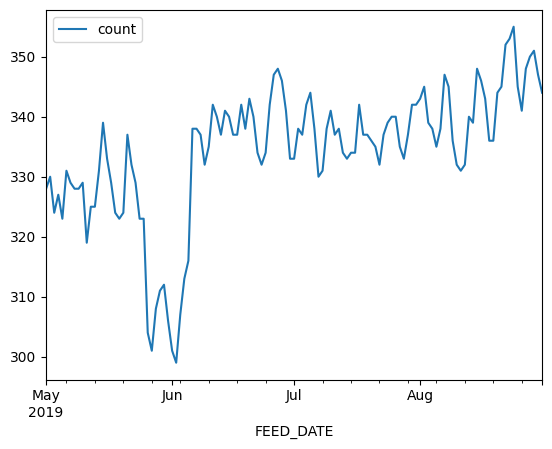

In [196]:
(
    sales
    .FEED_DATE
    .value_counts()
    .to_frame()
    .sort_values(by = 'FEED_DATE')
    .plot()
)

**CATEGORY**

In [197]:
(
    sales
    .CATEGORY
    .value_counts()
)

,count
CATEGORY,
1000 Inputs,26943
5000 Portable Media Players,5766
5600 Video Components,1898
5300 Headphones,1857
1500 Tablet Accessories,1576
10800 Xbox One Accessories,1399
1600 Sony PSP Games and Software,780
0400 Computer Peripherals,610
6200 PC Accessories,235


**SUB_CATEGORY**

In [198]:
(
    sales.groupby(["CATEGORY", "SUB_CATEGORY"])
    .size()
    .reset_index(name="COUNT")
    .sort_values(by=["CATEGORY", "COUNT"], ascending=[True, False])
)

,CATEGORY,SUB_CATEGORY,COUNT
0,0100 Wireless Phones,0191 Connected Wearables,51
1,0400 Computer Peripherals,0430 Computer Headsets and Mics - DELETED,254
2,0400 Computer Peripherals,0435 Webcams - DELETED,128
3,0400 Computer Peripherals,0455 Keyboards - DELETED,119
5,0400 Computer Peripherals,0499 Computer Peripherals Other - DELETED,105
4,0400 Computer Peripherals,0460 Mice - DELETED,4
7,1000 Inputs,1002 Mice,8692
6,1000 Inputs,1001 Keyboards,5871
9,1000 Inputs,1004 Computer Headsets and Mics,4206
8,1000 Inputs,1003 Computer Speakers,3043


### **BI-VARIATE ANALYSIS:**

**ORDERED_REVENUE & ORDERED_UNITS**

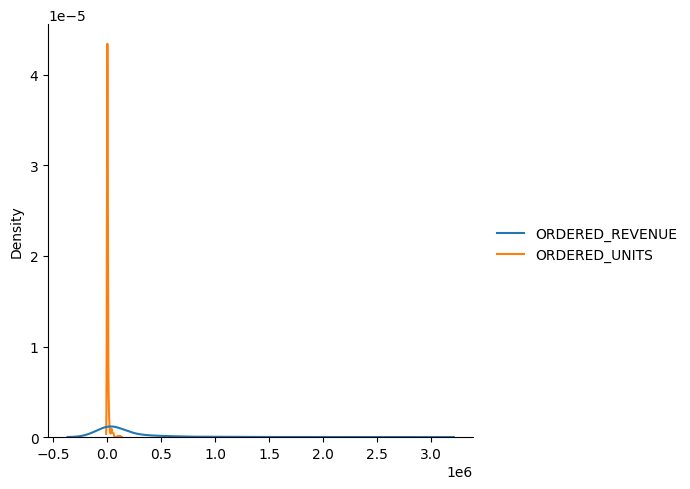

In [229]:
sales_metrics = (
    sales[["SKU_NAME","CATEGORY","ORDERED_REVENUE","ORDERED_UNITS"]]
    .groupby("SKU_NAME")
    .agg({
        "ORDERED_REVENUE":"sum",
        "ORDERED_UNITS":"sum"
    })

)

sns.displot(data = sales_metrics, kind='kde')

1. **Highly Right-Skewed Distribution:**

   * The plot is heavily skewed to the right, indicating that **most revenue values are concentrated near zero**, with a **long tail** extending towards higher values.
   * This suggests the presence of a few **high-revenue outliers**.

2. **Majority of Data Is Low Revenue:**

   * The peak of the density curve is very close to zero, showing that **most SKUs or orders generate low revenue**.

3. **Outliers Significantly Affect Distribution:**

   * Because the x-axis extends far to the right with low density, it's evident that a few **extremely high revenue values are pulling the tail**, which affects the overall distribution and may skew statistical analyses.

4. **Non-Normal Distribution:**

   * The shape of the curve confirms that `ORDERED_REVENUE` is **not normally distributed**, which implies that **parametric tests (like t-tests or linear regression) may not be appropriate** unless transformations (e.g., log) are applied.



**VIEWS & UNITS**

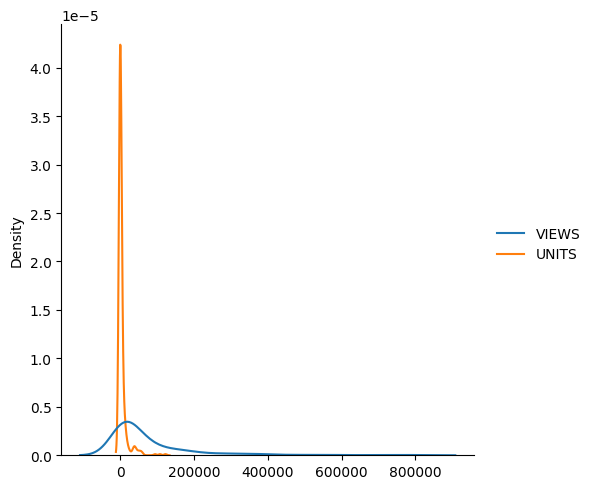

In [231]:
glance_metrics = (
    glance[["SKU_NAME","VIEWS","UNITS"]]
    .groupby("SKU_NAME")
    .agg({
        "VIEWS":"sum",
        "UNITS":"sum"
    })

)

sns.displot(data = glance_metrics, kind='kde')

<Axes: xlabel='ORDERED_REVENUE', ylabel='CATEGORY'>

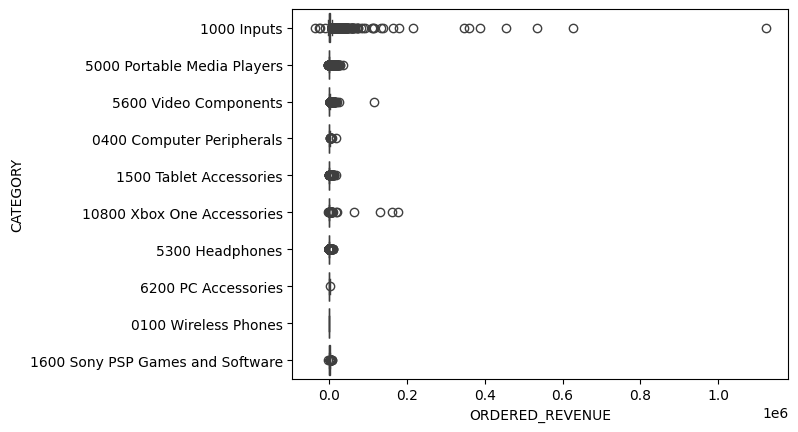

In [238]:
sns.boxplot(data=sales, x="ORDERED_REVENUE", y="CATEGORY")

**Applying log transform on the numerical variables**

<ipython-input-243-e0ccfb64a694>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_filtered['log_ordered_revenue'] = np.log1p(sales_filtered["ORDERED_REVENUE"])
<ipython-input-243-e0ccfb64a694>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_filtered['log_ordered_units'] = np.log1p(sales_filtered["ORDERED_UNITS"])


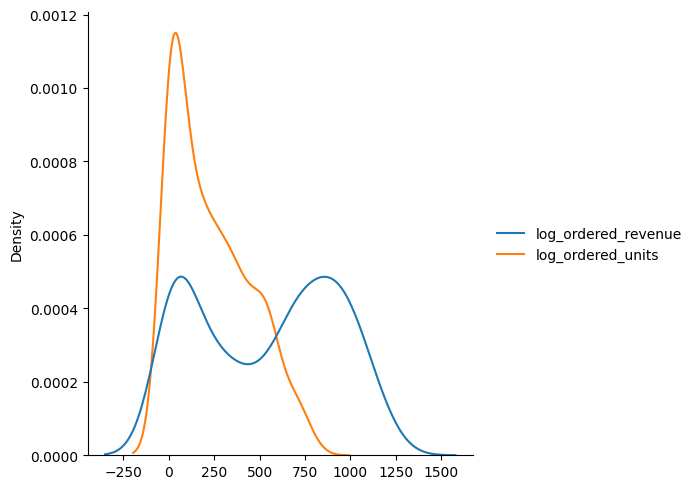

In [243]:
sales_filtered = sales[(sales.ORDERED_REVENUE > 0) & (sales.ORDERED_UNITS > 0)]

sales_filtered['log_ordered_revenue'] = np.log1p(sales_filtered["ORDERED_REVENUE"])
sales_filtered['log_ordered_units'] = np.log1p(sales_filtered["ORDERED_UNITS"])

sales_log_metrics = (
    sales_filtered[["SKU_NAME","log_ordered_revenue","log_ordered_units"]]
    .groupby("SKU_NAME")
    .agg({
        "log_ordered_revenue":"sum",
        "log_ordered_units":"sum"
    })

)

sns.displot(data = sales_log_metrics, kind='kde')

1. **Right-Skewness Reduced (But Still Present):**

   * The original distributions were extremely skewed (as seen earlier).
   * The **log transformation** has pulled most of the data closer to a central peak and reduced extreme values.
   * However, both curves still show some degree of right skewness.

2. **Multiple Modes (Bimodal/Multimodal Behavior):**

   * The `log_ordered_revenue` curve shows multiple peaks — this suggests that the revenue might come from **distinct groups** (e.g., low-cost vs. high-cost SKUs).
   * The `log_ordered_units` curve is more **unimodal**, indicating a more concentrated pattern of unit orders.




**CATEGORY - ORDERED_REVENUE - ORDERED_UNITS**

In [250]:
categories_metrics = (
    sales[["CATEGORY","ORDERED_REVENUE", "ORDERED_UNITS"]]
    .groupby("CATEGORY")
    .agg({
        "ORDERED_REVENUE":"sum",
        "ORDERED_UNITS":"sum"
    })
)

categories_metrics

,ORDERED_REVENUE,ORDERED_UNITS
CATEGORY,,
0100 Wireless Phones,29115.84,0.0
0400 Computer Peripherals,637928.54,23085.0
1000 Inputs,77409705.79,1963436.0
10800 Xbox One Accessories,1206332.62,8121.0
1500 Tablet Accessories,1172043.07,13029.0
1600 Sony PSP Games and Software,1042615.09,5569.0
5000 Portable Media Players,6079046.13,52460.0
5300 Headphones,835233.47,7260.0
5600 Video Components,2200516.21,18184.0


**Joining both the tables**

In [257]:
df_merged = (
    pd.merge(
        sales,
        glance,
        on=["SKU_NAME", "FEED_DATE"],
        how="inner"  # change to 'left', 'right', or 'outer' if needed
    )
)

df_merged.drop(columns=["log_ordered_revenue","log_ordered_units","UNITS"], inplace=True)
df_merged["UNIT_CONVERSION"] = df_merged["ORDERED_UNITS"]/df_merged["VIEWS"]

df_merged

,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS,VIEWS,UNIT_CONVERSION
0,B12020KBUI,2019-05-18,1000 Inputs,1002 Mice,0.00,0.0,0.0,8,0.000000
1,B12020KBUI,2019-05-19,1000 Inputs,1002 Mice,0.00,0.0,0.0,5,0.000000
2,B12020KBUI,2019-05-22,1000 Inputs,1002 Mice,0.00,0.0,0.0,8,0.000000
3,B12020KBUI,2019-05-23,1000 Inputs,1002 Mice,0.00,0.0,0.0,4,0.000000
4,B12020KBUI,2019-05-27,1000 Inputs,1002 Mice,0.00,0.0,0.0,9,0.000000
...,...,...,...,...,...,...,...,...,...
40421,D29S5IMRDI,2019-08-27,1000 Inputs,1007 Other Input Devices,129.99,1.0,0.0,104,0.009615
40422,D29S5IMRDI,2019-08-28,1000 Inputs,1007 Other Input Devices,259.98,2.0,0.0,108,0.018519
40423,D29S5IMRDI,2019-08-29,1000 Inputs,1007 Other Input Devices,259.98,2.0,0.0,86,0.023256
40424,D29S5IMRDI,2019-08-30,1000 Inputs,1007 Other Input Devices,259.98,2.0,0.0,89,0.022472


**Analyzing the unit_conversion with REP_OOS**

<Axes: xlabel='REP_OOS', ylabel='UNIT_CONVERSION'>

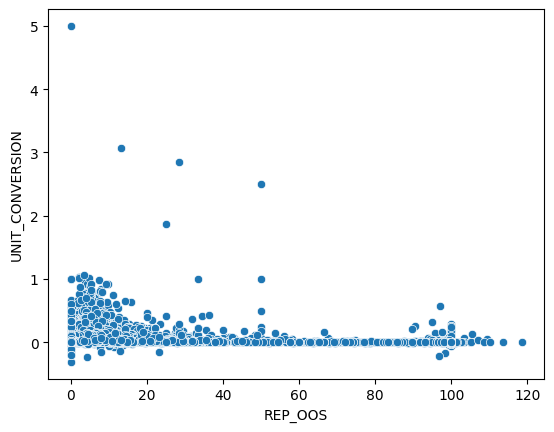

In [260]:
sns.scatterplot(data=df_merged, x="REP_OOS", y="UNIT_CONVERSION")

In [264]:
df_merged[["UNIT_CONVERSION", "REP_OOS"]].corr(method="pearson")   # linear relation

,UNIT_CONVERSION,REP_OOS
UNIT_CONVERSION,1.000000,-0.057051
REP_OOS,-0.057051,1.000000


In [265]:
df_merged[["UNIT_CONVERSION", "REP_OOS"]].corr(method="spearman")  # monotonic relation

,UNIT_CONVERSION,REP_OOS
UNIT_CONVERSION,1.000000,0.349424
REP_OOS,0.349424,1.000000


**Correlation between ORDERED_UNITS and VIEWS**

In [266]:
df_merged[["ORDERED_UNITS","VIEWS"]].corr(method="pearson")   # linear relation

,ORDERED_UNITS,VIEWS
ORDERED_UNITS,1.000000,0.749537
VIEWS,0.749537,1.000000


- There's a very high correlation between the ORDERED_UNITS and VIEWS.

**Analyzing the variation of REP_OOS with respect to time for the most profitable and least profitable SKUs:**

<Axes: xlabel='FEED_DATE', ylabel='REP_OOS'>

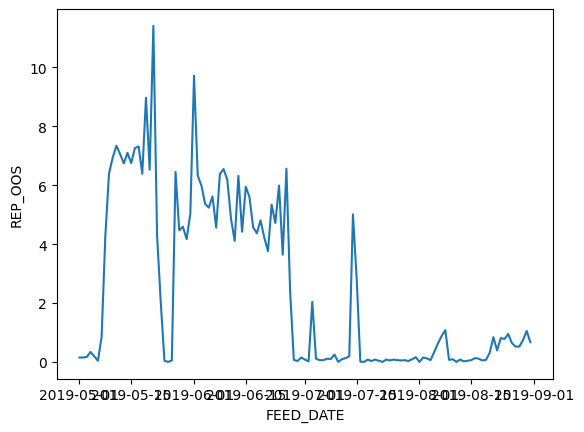

In [283]:
most_profitable_SKU = (
    sales[["SKU_NAME","ORDERED_REVENUE"]]
    .groupby("SKU_NAME")
    .agg({"ORDERED_REVENUE":"sum"})
    .sort_values(by="ORDERED_REVENUE", ascending=False)
    .head(1)
    .index[0]
)


sns.lineplot(sales[sales.SKU_NAME == most_profitable_SKU], y = 'REP_OOS', x='FEED_DATE')

In [289]:
some_revenue = sales[sales.ORDERED_REVENUE > 0]

least_profitable_SKU = (
    some_revenue[["SKU_NAME","ORDERED_REVENUE"]]
    .groupby("SKU_NAME")
    .agg({"ORDERED_REVENUE":"sum"})
    .sort_values(by="ORDERED_REVENUE", ascending=False)
    #.tail(1)
    #.index[0]
)

least_profitable_SKU

#sns.lineplot(sales[sales.SKU_NAME == least_profitable_SKU], y = 'REP_OOS', x='FEED_DATE')

,ORDERED_REVENUE
SKU_NAME,
D08L95YHWO,2843437.74
C182[ZK3G1,2794033.34
C02QYV5U3W,2702087.25
B115WBIYPC,2551977.42
B07:KN[6M6,2436501.32
...,...
B128RO:5YU,27.95
B10LJIXFL0,21.95
B00;3H5XG9,19.98


## Assignment Solutions

#### **Problem-3: Somewhere in this timeframe, there was a Sale Event. Identify the dates.**

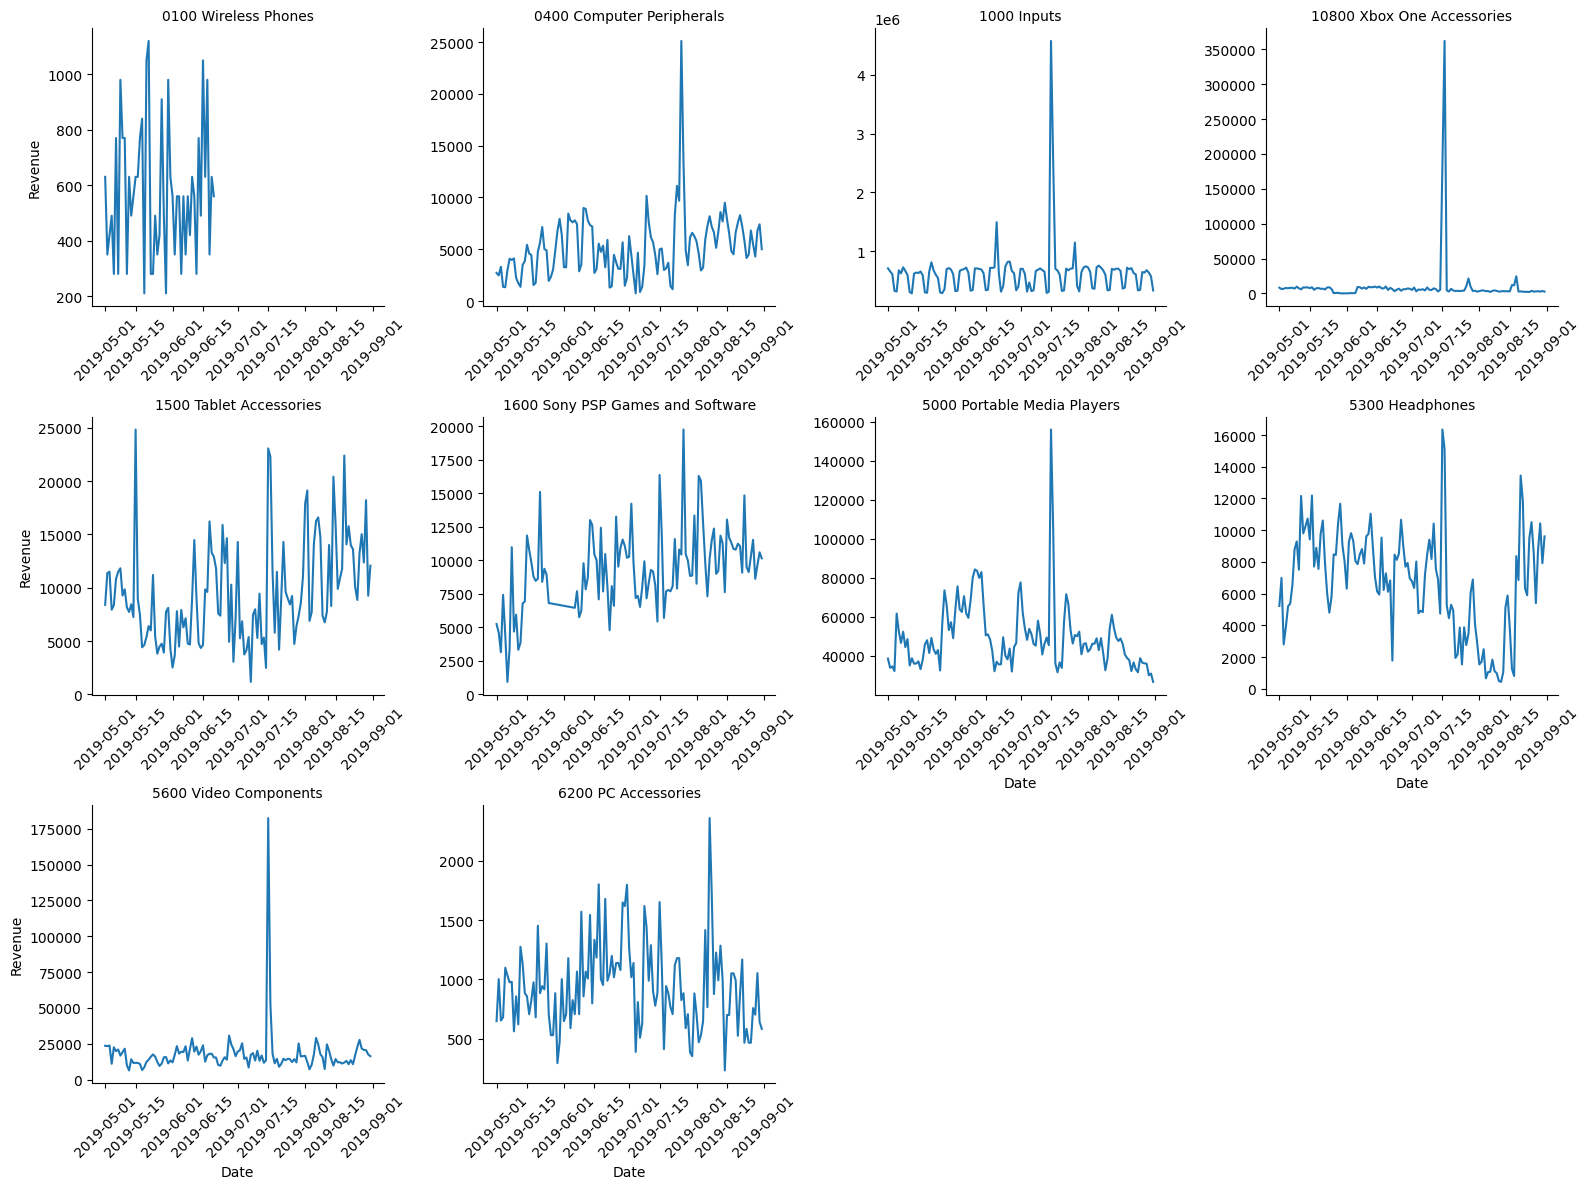

In [199]:
sales_daily = (
    sales[["FEED_DATE","ORDERED_REVENUE","ORDERED_UNITS","REP_OOS","CATEGORY"]]
    .groupby(by=["FEED_DATE","CATEGORY"])
    .sum()
    .reset_index()
)

g = sns.FacetGrid(sales_daily, col="CATEGORY", col_wrap=4, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x="FEED_DATE", y="ORDERED_REVENUE")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Date", "Revenue")
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [200]:
daily = (
    sales[["FEED_DATE","ORDERED_REVENUE","ORDERED_UNITS","REP_OOS","CATEGORY"]]
    .groupby(by=["FEED_DATE"])
    .sum()
)

sales_spike_date = daily["ORDERED_REVENUE"].idxmax()
sales_spike_value = daily["ORDERED_REVENUE"].max()

print(f"Spike occurred on {sales_spike_date.date()} with {sales_spike_value} ORDERED_REVENUE")

Spike occurred on 2019-07-15 with 5158848.46 ORDERED_REVENUE


In [201]:
glance_daily = (
    glance[["FEED_DATE","UNITS","VIEWS"]]
    .groupby(by="FEED_DATE")
    .sum()

)

glance_spike_date = glance_daily["VIEWS"].idxmax()
glance_spike_value = glance_daily["VIEWS"].max()

print(f"Spike occurred on {glance_spike_date.date()} with {glance_spike_value} VIEWS")

Spike occurred on 2019-07-15 with 1971285 VIEWS


<Axes: xlabel='FEED_DATE'>

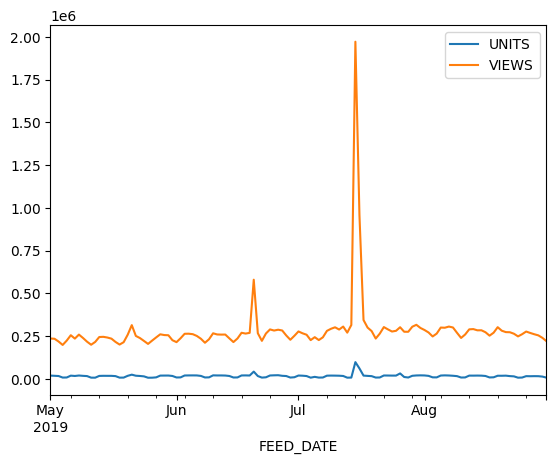

In [202]:
glance_daily.plot()

**Conclusion: The sale event happend on `2019-07-15`.**

#### **Problem-4: Does having a sale event cannibalize sales in the immediate aftermath? Highlighting a few examples would suffice**


In [203]:
# Let's extract the data of 30 days before the sale event and 30 days after the sale event

units_sold_before = (
    sales[(sales['FEED_DATE']<'2019-07-14') & (sales['FEED_DATE']>'2019-06-14')].groupby(["FEED_DATE"]).agg({'ORDERED_UNITS':'sum'})
)

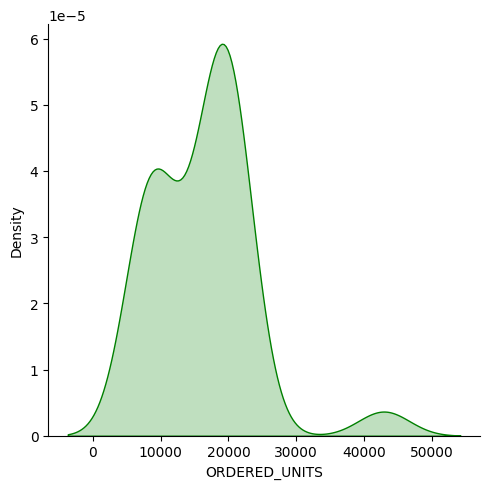

In [204]:
sns.displot(data=units_sold_before, x="ORDERED_UNITS", kind="kde", fill=True, color='green')

In [205]:
units_sold_after = (
    sales[(sales['FEED_DATE']>'2019-07-16') & (sales['FEED_DATE']<'2019-08-16')].groupby(["FEED_DATE"]).agg({'ORDERED_UNITS':'sum'})
)

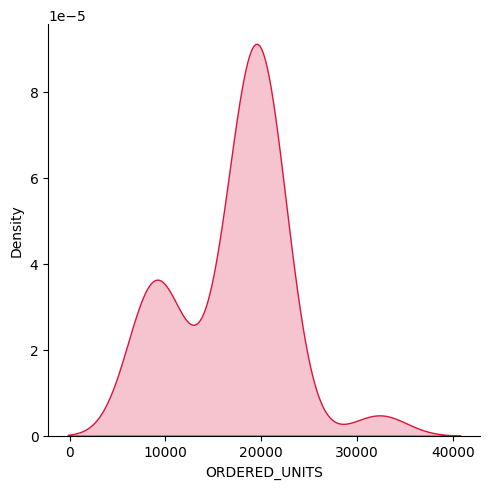

In [206]:
sns.displot(data=units_sold_after, x="ORDERED_UNITS", kind="kde", fill=True, color='crimson')

In [207]:
# Let's check if the data is normally distributed

from scipy.stats import shapiro

# Shapiro-Wilk test
shapiro_before = shapiro(units_sold_before)
shapiro_after = shapiro(units_sold_after)

print(f"Before Sale: W={shapiro_before.statistic:.4f}, p-value={shapiro_before.pvalue:.4f}")
print(f"After Sale: W={shapiro_after.statistic:.4f}, p-value={shapiro_after.pvalue:.4f}")

Before Sale: W=0.7996, p-value=0.0001
After Sale: W=0.8210, p-value=0.0002


- p-value < 0.05, data is not normally distributed → Use non-parametric test like Mann-Whitney U

In [208]:
from scipy.stats import mannwhitneyu
import numpy as np

# Convert lists to arrays if needed
before = np.array(units_sold_before)
after = np.array(units_sold_after)

# Hypotheses
# H0: Mean sales after = Mean sales before
# H1: Mean sales after > Mean sales before

# Significane level
alpha = 0.05


# --- Mann-Whitney U Test ---
u_stat, p_val_u = mannwhitneyu(after, before, alternative='greater')

# --- Summary Statistics ---
median_before = np.median(before)
median_after = np.median(after)

print("\nSummary Stats:")
print("Median Before:", median_before)
print("Median After:", median_after)
print("U-statistic:", u_stat)
print("p-value:", p_val_u)


# --- Interpretation ---
if p_val_u < alpha:
    print("Reject the null hypothesis: Sales increased significantly after the event.")
else:
    print("Fail to reject the null hypothesis: No significant increase in sales after the event.")


# Hypotheses
# H0: Mean sales after = Mean sales before
# H1: Mean sales after < Mean sales before


# Perform one-tailed Mann-Whitney U Test (alternative: after < before)
stat, p_value = mannwhitneyu(after, before, alternative='less')

# Output results
print("\nSummary Stats:")
print("Median before sale:", np.median(before))
print("Median after sale:", np.median(after))
print("Mann-Whitney U statistic:", stat)
print("p-value:", p_value)

# Interpretation
if p_value < alpha:
    print("Reject the null hypothesis: Sales decreased significantly after the event.")
else:
    print("Fail to reject the null hypothesis: No significant decrease in sales after the event.")



Summary Stats:
Median Before: 17468.0
Median After: 19425.0
U-statistic: [497.]
p-value: [0.17554927]
Fail to reject the null hypothesis: No significant increase in sales after the event.

Summary Stats:
Median before sale: 17468.0
Median after sale: 19425.0
Mann-Whitney U statistic: [497.]
p-value: [0.82833918]
Fail to reject the null hypothesis: No significant decrease in sales after the event.


**Conclusion: There was no significant increase or decrease in the sales after the sale event.**

#### **Problem-7: For SKU Name C120[H:8NV, discuss whether Unit Conversion (Units/Views) is affected by Average Selling Price.**

In [209]:
SKU_conversion = pd.read_csv("/content/SKU_Unit_Conversion_vs_ Average_Selling_Price.csv")
SKU_conversion

,FEED_DATE,SKU_NAME,avg_selling_price,unit_conversion
0,2019-05-01,C120[H:8NV,14.99,6.882353
1,2019-05-02,C120[H:8NV,14.99,6.126761
2,2019-05-03,C120[H:8NV,14.99,6.125000
3,2019-05-04,C120[H:8NV,14.99,13.461538
4,2019-05-05,C120[H:8NV,14.99,14.782609
...,...,...,...,...
118,2019-08-27,C120[H:8NV,12.88,6.410959
119,2019-08-28,C120[H:8NV,12.88,6.158537
120,2019-08-29,C120[H:8NV,12.88,5.459459
121,2019-08-30,C120[H:8NV,12.88,5.569444


In [210]:
SKU_conversion = pd.read_csv("/content/SKU_Unit_Conversion_vs_ Average_Selling_Price.csv")


from scipy.stats import pearsonr, spearmanr

# Pearson correlation
pearson_corr, pearson_p = pearsonr(SKU_conversion['avg_selling_price'], SKU_conversion['unit_conversion'])

# Spearman correlation
spearman_corr, spearman_p = spearmanr(SKU_conversion['avg_selling_price'], SKU_conversion['unit_conversion'])

print(f"Pearson Correlation: {pearson_corr}, p-value: {pearson_p}")
print(f"Spearman Correlation: {spearman_corr}, p-value: {spearman_p}")



Pearson Correlation: 0.008780455540154374, p-value: 0.9232128015677928
Spearman Correlation: 0.04036973819497394, p-value: 0.6575260320834743


**Conclusion: Based on both Pearson and Spearman correlations, Unit Conversion is not significantly influenced by Average Selling Price, it means pricing strategies (as reflected in ASP) may not have had a clear impact on how effectively views were converted into sales.**